In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import numpy as np
from datetime import datetime


In [207]:
!pip install yfinance 
#installing API

In [209]:
import yfinance as yf

<h1> Loading and Preparing COVID 19 DATA <h1>

In [310]:
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,week
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,64.83,0.511,41128772,NaN,NaN,NaN,NaN,2020,1,1
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,64.83,0.511,41128772,NaN,NaN,NaN,NaN,2020,1,2
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,64.83,0.511,41128772,NaN,NaN,NaN,NaN,2020,1,2
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,64.83,0.511,41128772,NaN,NaN,NaN,NaN,2020,1,2
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,64.83,0.511,41128772,NaN,NaN,NaN,NaN,2020,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,61.49,0.571,16320539,NaN,NaN,NaN,NaN,2024,7,31
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,61.49,0.571,16320539,NaN,NaN,NaN,NaN,2024,8,31
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,61.49,0.571,16320539,NaN,NaN,NaN,NaN,2024,8,31
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,61.49,0.571,16320539,NaN,NaN,NaN,NaN,2024,8,31


In [565]:
# Load the COVID-19 data
covid_df = pd.read_csv('Coronavirus_cases_daily_update.csv')
covid_df

#convert the 'date' column to datetime
covid_df['date'] = pd.to_datetime(covid_df['date'])

#create separate 'year' and 'month' columns for grouping
covid_df['year'] = covid_df['date'].dt.year
covid_df['month'] = covid_df['date'].dt.month
covid_df['week'] = covid_df['date'].dt.isocalendar().week

# Group by 'location', 'year', and 'month', and sum the cases for each group
weekly_covid_df = covid_df.groupby(['continent','location', 'year', 'month','week']).agg({
    'new_cases_smoothed': 'sum',
    'new_deaths_smoothed': 'sum',
    'new_vaccinations_smoothed': 'sum',
    'icu_patients_per_million': 'sum',
}).reset_index()

#make new column called yearly_week
weekly_covid_df['yearly_week'] = weekly_covid_df['year'].astype(str) + '_W' + weekly_covid_df['week'].astype(str)

# Drop 'year' and 'month' columns if not needed
weekly_covid_df.drop(columns=['month', "week"], inplace=True)

# Display the processed DataFrame
weekly_covid_df.head(50)

,continent,location,year,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,yearly_week
0,Africa,Algeria,2020,0.000,0.000,0.0,0.000,2020_W1
1,Africa,Algeria,2020,0.000,0.000,0.0,0.000,2020_W2
2,Africa,Algeria,2020,0.000,0.000,0.0,0.000,2020_W3
3,Africa,Algeria,2020,0.000,0.000,0.0,0.000,2020_W4
4,Africa,Algeria,2020,0.000,0.000,0.0,0.000,2020_W5
5,Africa,Algeria,2020,0.000,0.000,0.0,0.000,2020_W5
6,Africa,Algeria,2020,0.000,0.000,0.0,0.000,2020_W6
7,Africa,Algeria,2020,0.000,0.000,0.0,0.000,2020_W7
8,Africa,Algeria,2020,0.000,0.000,0.0,0.000,2020_W8
9,Africa,Algeria,2020,0.000,0.000,0.0,0.000,2020_W9


LOADING AND PREPARING DAX DATA

In [453]:
# Import data source about Germany's top publicly listed companies
df_100_ger = pd.read_csv("100_companies_GER.csv")

#df_100_ger.head()

In [296]:
df_100_ger_ind = []

for company in df_100_ger["Symbol"]:
    stock = yf.Ticker(company) # Download data for a specific stock 
    info = stock.info
    stockinfo = stock.history(period="5y") # Get historical market data
    industry = info.get("industry", "Unknown")
    sector = info.get("sector", "Unknown")  
    stockinfo["Industry"] = industry
    stockinfo["Sector"] = sector
    stockinfo['Trading Symbol'] = company
    stockinfo['Company Name'] = df_100_ger[df_100_ger['Symbol'] == company]['Name'].values[0]
    df_100_ger_ind.append(stockinfo[['Trading Symbol', 'Company Name', 'Close', "Industry", "Sector"]])

df_100_ger_combined = pd.concat(df_100_ger_ind, axis=0)
df_100_ger_combined.reset_index(inplace=True)

BIRK: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']
1SXP.DE: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']
IOS.DE: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SYAB.DE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SYAB.DE&crumb=rJ8iy6KngxS
$SYAB.DE: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
R3NK.DE: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']
DOU.DE: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']
EIN3.DE: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']
NCH2.DE

In [298]:
df_100_ger_combined.to_csv('df_100_ger_combined.csv', index=False)

In [457]:
# Import data source about GERMANY's top publicly listed companies
df_100_ger_combined = pd.read_csv("df_100_ger_combined.csv") 


In [459]:
df_100_ger_combined["Date"] = df_100_ger_combined["Date"].apply(lambda x: x.split())
df_100_ger_combined["date"] = df_100_ger_combined["Date"].apply(lambda x: x[0])
df_100_ger_combined = df_100_ger_combined.drop(columns="Date")
df_100_ger_combined.colums = df_100_ger_combined.columns = [col.lower() for col in df_100_ger_combined.columns]

/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_1409/573877388.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_100_ger_combined.colums = df_100_ger_combined.columns = [col.lower() for col in df_100_ger_combined.columns]


In [461]:
# Convert 'Date' column to datetime format if it's not already
df_100_ger_combined['date'] = pd.to_datetime(df_100_ger_combined['date'])

# Add a 'week' column to extract the calendar week number
df_100_ger_combined['week'] = df_100_ger_combined['date'].dt.isocalendar().week
df_100_ger_combined['year'] = df_100_ger_combined['date'].dt.year

# Add a 'month' column to extract the month number
df_100_ger_combined['month'] = df_100_ger_combined['date'].dt.month

df_100_ger_combined["date"] = df_100_ger_combined["date"].apply(lambda x: x.strftime('%Y-%m-%d'))


# make new column called yearly_week
df_100_ger_combined['yearly_week'] = df_100_ger_combined['year'].astype(str) + '_W' + df_100_ger_combined['week'].astype(str)

df_100_ger_combined

,trading symbol,company name,close,industry,sector,date,week,year,month,yearly_week
0,SAP,SAP,104.827469,Software - Application,Technology,2019-10-07,41,2019,10,2019_W41
1,SAP,SAP,103.335564,Software - Application,Technology,2019-10-08,41,2019,10,2019_W41
2,SAP,SAP,106.218697,Software - Application,Technology,2019-10-09,41,2019,10,2019_W41
3,SAP,SAP,105.486481,Software - Application,Technology,2019-10-10,41,2019,10,2019_W41
4,SAP,SAP,115.508827,Software - Application,Technology,2019-10-11,41,2019,10,2019_W41
...,...,...,...,...,...,...,...,...,...,...
435281,C0M.F,Compleo Charging Solutions,0.121000,Electrical Equipment & Parts,Industrials,2024-10-01,40,2024,10,2024_W40
435282,C0M.F,Compleo Charging Solutions,0.121000,Electrical Equipment & Parts,Industrials,2024-10-02,40,2024,10,2024_W40
435283,C0M.F,Compleo Charging Solutions,0.120000,Electrical Equipment & Parts,Industrials,2024-10-03,40,2024,10,2024_W40
435284,C0M.F,Compleo Charging Solutions,0.170000,Electrical Equipment & Parts,Industrials,2024-10-04,40,2024,10,2024_W40


In [ ]:
DATA FRAME INCLUDING SUM OF DAX

In [463]:
df_100_ger_combined
df_dax_mean = df_100_ger_combined.groupby(['year',"date", "yearly_week"]).agg({
    'close': 'mean',
    }).reset_index()

df_dax_mean

,year,date,yearly_week,close
0,2019,2019-10-04,2019_W40,51.020679
1,2019,2019-10-07,2019_W41,50.125728
2,2019,2019-10-08,2019_W41,49.953415
3,2019,2019-10-09,2019_W41,50.036731
4,2019,2019-10-10,2019_W41,50.058318
...,...,...,...,...
1288,2024,2024-09-30,2024_W40,47.815860
1289,2024,2024-10-01,2024_W40,47.955414
1290,2024,2024-10-02,2024_W40,48.070684
1291,2024,2024-10-03,2024_W40,47.901550


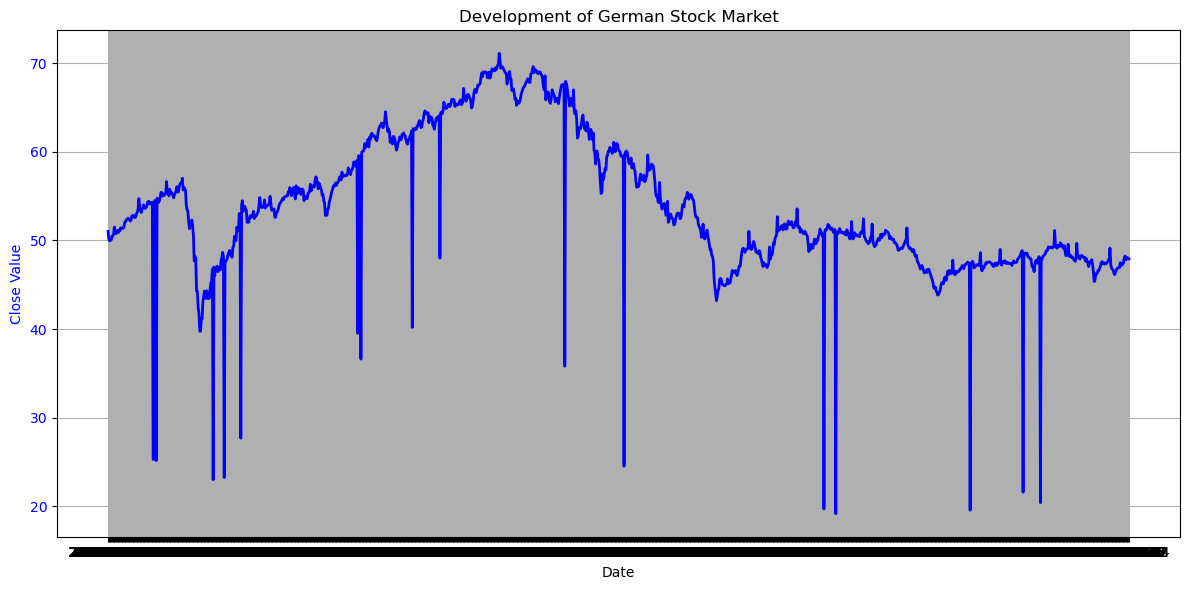

In [465]:
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot Variable1 on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Value', color='blue')
ax1.plot(df_dax_mean["date"], df_dax_mean["close"], color='blue', label='Close Value', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')
# Add title and grid
plt.title('Development of German Stock Market')
ax1.grid()
# Show the plot
plt.tight_layout()
plt.show()

In [467]:
df_100_ger_combined
df_dax_mean = df_100_ger_combined.groupby(['year',"date", "yearly_week"]).agg({
    'close': 'mean',
    }).reset_index()


## Cleaning the Outliers

# Calculate Z-scores
df_dax_mean['Z-Score'] = (df_dax_mean["close"]  - df_dax_mean["close"] .mean()) / df_dax_mean["close"] .std()

# Identify outliers (threshold can be adjusted)
threshold = 3

outliers = df_dax_mean[df_dax_mean['Z-Score'].abs() > threshold]

# Remove outliers based on Z-score
df_dax_mean_no_outliers = df_dax_mean[df_dax_mean['Z-Score'].abs() <= threshold]
df_dax_mean_no_outliers

,year,date,yearly_week,close,Z-Score
0,2019,2019-10-04,2019_W40,51.020679,-0.376236
1,2019,2019-10-07,2019_W41,50.125728,-0.492928
2,2019,2019-10-08,2019_W41,49.953415,-0.515396
3,2019,2019-10-09,2019_W41,50.036731,-0.504532
4,2019,2019-10-10,2019_W41,50.058318,-0.501718
...,...,...,...,...,...
1288,2024,2024-09-30,2024_W40,47.815860,-0.794109
1289,2024,2024-10-01,2024_W40,47.955414,-0.775913
1290,2024,2024-10-02,2024_W40,48.070684,-0.760883
1291,2024,2024-10-03,2024_W40,47.901550,-0.782936


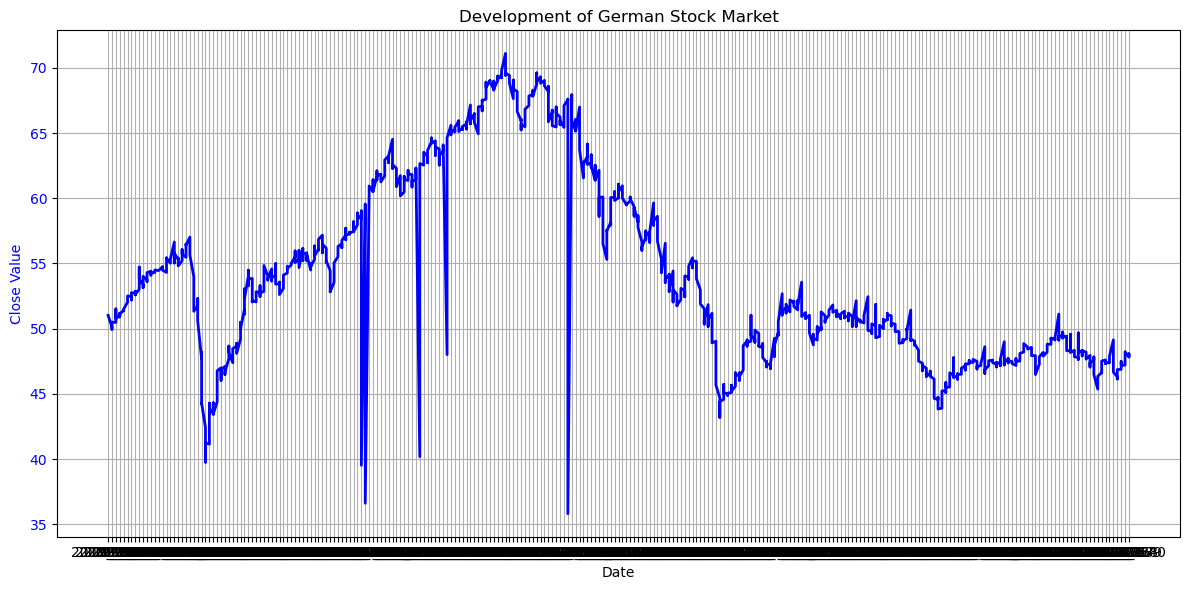

In [469]:
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot Variable1 on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Value', color='blue')
ax1.plot(df_dax_mean_no_outliers["yearly_week"], df_dax_mean_no_outliers["close"], color='blue', label='Close Value', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')
# Add title and grid
plt.title('Development of German Stock Market')
ax1.grid()
# Show the plot
plt.tight_layout()
plt.show()

BASE DATA FRAME TO USE ON ALL INDUSTRIES AND HYPOTHESIS FOR DAX BY INDUSTRY

In [471]:
industry_data_dax = df_100_ger_combined.drop(columns="company name").groupby(['industry', "date", "yearly_week",]).agg({"close":"mean"}).reset_index()

#industry_data_sp500.pivot
industry_data_dax = pd.pivot_table(industry_data_dax, values="close", index="yearly_week", columns="industry", aggfunc="sum", fill_value=None, margins=False, dropna=False, margins_name='All', sort=True)
industry_data_dax.head()

industry,Advertising Agencies,Aerospace & Defense,Agricultural Inputs,Airlines,Airports & Air Services,Apparel Manufacturing,Asset Management,Auto & Truck Dealerships,Auto Manufacturers,Auto Parts,...,Textile Manufacturing,Thermal Coal,Tools & Accessories,Travel Services,Unknown,Utilities - Diversified,Utilities - Independent Power Producers,Utilities - Regulated Electric,Utilities - Renewable,Waste Management
yearly_week,,,,,,,,,,,,,,,,,,,,,
2019_W1,17.818399,125.870174,32.299523,11.196473,75.779999,35.896408,10.057815,NaN,61.696094,30.341039,...,12.770423,17.728483,19.872155,29.486866,119.337284,194.207265,289.255554,418.806458,10.492516,44.867790
2019_W40,17.256215,122.879509,33.786873,9.507792,76.339996,38.626396,9.452600,NaN,52.768475,26.740968,...,13.758232,17.821302,19.973880,26.700191,117.759621,163.947604,295.992582,347.520264,9.286953,52.852730
2019_W41,87.425275,612.757221,165.776096,49.060475,380.099991,181.564800,48.550798,NaN,270.317949,133.103561,...,68.650212,89.849058,100.320661,134.900785,589.455549,822.898155,1373.295263,1742.947815,48.225183,260.081097
2019_W42,86.861555,599.544710,164.371138,51.990936,379.359993,153.509842,48.329639,NaN,292.797412,137.431988,...,68.462279,90.034695,100.497091,154.640783,591.272228,819.297251,1385.035614,1753.640869,50.010275,257.799686
2019_W43,87.129064,592.725279,168.616643,54.112875,375.559998,155.136208,49.239984,NaN,301.554623,141.868521,...,68.180381,90.034695,99.855992,153.085426,591.569384,837.187566,1392.585289,1769.680267,49.852585,253.997322


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x2a69916a0>.

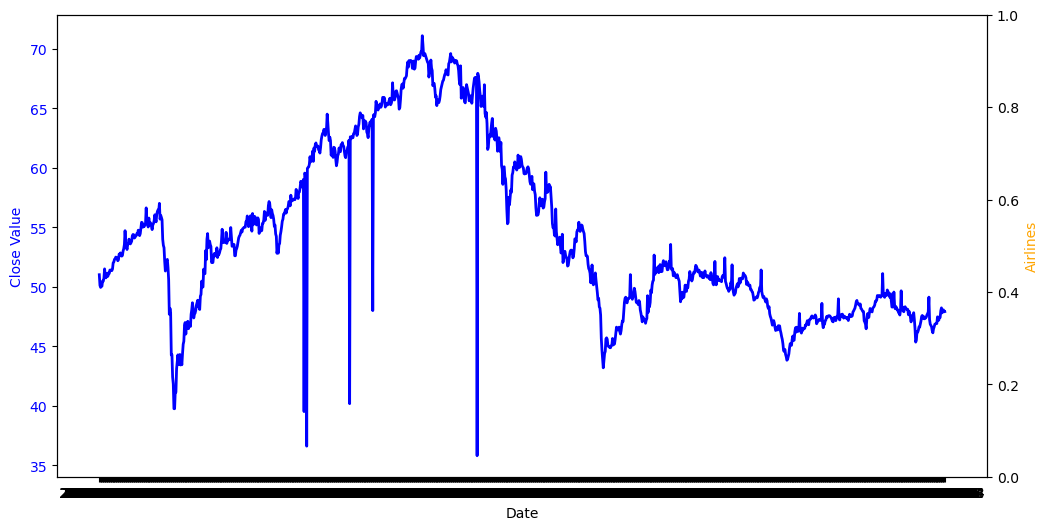

In [408]:
# Visualize the development of Airline Industry and Pharma Industry against DAX


fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Variable1 on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Value', color='blue')
ax1.plot(df_dax_mean_no_outliers["date"], df_dax_mean_no_outliers["close"], color='blue', label='Close Value', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Variable2
ax2 = ax1.twinx()
ax2.set_ylabel('Airlines', color='orange')
ax2.plot(industry_data_dax.index, industry_data_dax["Airlines"], color='orange', label='Airlines', linewidth=2)
ax2.tick_params(axis='y', labelcolor='orange')

# Create a third y-axis for Variable3
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move third axis outward
ax3.set_ylabel('Variable 3', color='green')
ax3.plot(industry_data_dax.index, industry_data_dax["Aerospace & Defense"], color='green', label='Closing Value', linewidth=2)
ax3.tick_params(axis='y', labelcolor='green')

# Add title and grid
plt.title('Development of German Stock Market vs. Specific Industries')
ax1.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [414]:
industry_data_dax

industry,Advertising Agencies,Aerospace & Defense,Agricultural Inputs,Airlines,Airports & Air Services,Apparel Manufacturing,Asset Management,Auto & Truck Dealerships,Auto Manufacturers,Auto Parts,...,Textile Manufacturing,Thermal Coal,Tools & Accessories,Travel Services,Unknown,Utilities - Diversified,Utilities - Independent Power Producers,Utilities - Regulated Electric,Utilities - Renewable,Waste Management
yearly_week,,,,,,,,,,,,,,,,,,,,,
2019-01-07,17.818399,125.870174,32.299523,11.196473,75.779999,35.896408,10.057815,NaN,61.696094,30.341039,...,12.770423,17.728483,19.872155,29.486866,119.337284,194.207265,289.255554,418.806458,10.492516,44.867790
2019-10-07,17.256215,122.879509,33.786873,9.507792,76.339996,38.626396,9.452600,NaN,52.768475,26.740968,...,13.758232,17.821302,19.973880,26.700191,117.759621,163.947604,295.992582,347.520264,9.286953,52.852730
2019-10-14,87.425275,612.757221,165.776096,49.060475,380.099991,181.564800,48.550798,NaN,270.317949,133.103561,...,68.650212,89.849058,100.320661,134.900785,589.455549,822.898155,1373.295263,1742.947815,48.225183,260.081097
2019-10-21,86.861555,599.544710,164.371138,51.990936,379.359993,153.509842,48.329639,NaN,292.797412,137.431988,...,68.462279,90.034695,100.497091,154.640783,591.272228,819.297251,1385.035614,1753.640869,50.010275,257.799686
2019-10-28,87.129064,592.725279,168.616643,54.112875,375.559998,155.136208,49.239984,NaN,301.554623,141.868521,...,68.180381,90.034695,99.855992,153.085426,591.569384,837.187566,1392.585289,1769.680267,49.852585,253.997322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,88.767953,608.153048,160.872800,37.141557,273.579998,282.554897,74.717946,19.431,378.495936,150.450324,...,48.950980,108.006201,114.264860,31.790000,337.361511,797.379347,246.659998,1925.558350,136.285683,50.670000
2024-02-05,87.590140,616.188817,155.970896,36.619568,269.899998,282.515991,72.789895,18.644,385.195196,149.622019,...,47.356863,108.777674,114.344164,31.944000,342.980000,765.381491,247.240002,1964.380066,132.637324,48.379999
2024-02-12,89.810874,665.332557,149.586266,35.610962,258.400002,305.663475,74.250860,18.661,389.606071,151.070854,...,46.764705,109.934883,114.531296,32.886000,330.374999,752.199017,242.970005,1950.792450,129.029490,50.540001


In [567]:
# Merge the COVID-19 and industry data on 'year' and 'week'
covid_dax_industries = pd.merge(weekly_covid_df, industry_data_dax, on=['yearly_week'], how='inner')


#list(covid_sp500_industries.columns)
covid_dax_industries.head()


,continent,location,year,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,yearly_week,Advertising Agencies,Aerospace & Defense,...,Textile Manufacturing,Thermal Coal,Tools & Accessories,Travel Services,Unknown,Utilities - Diversified,Utilities - Independent Power Producers,Utilities - Regulated Electric,Utilities - Renewable,Waste Management
0,Africa,Algeria,2020,0.0,0.0,0.0,0.0,2020_W1,34.993268,254.489887,...,25.493864,35.456966,39.810850,59.868055,234.174568,377.003582,577.691568,834.048676,21.042792,88.214638
1,Africa,Algeria,2020,0.0,0.0,0.0,0.0,2020_W2,86.160513,645.862893,...,62.959434,88.642416,99.475709,145.256828,588.663755,1006.846870,1424.345455,2102.943298,55.514393,222.057549
2,Africa,Algeria,2020,0.0,0.0,0.0,0.0,2020_W3,86.289925,666.610565,...,62.113735,92.262356,99.833810,137.441189,593.369608,1041.139606,1425.895233,2124.329010,57.076000,225.479660
3,Africa,Algeria,2020,0.0,0.0,0.0,0.0,2020_W4,90.143689,680.689050,...,62.489601,100.059175,99.926560,131.733053,589.616489,1032.039018,1439.364231,2063.735779,58.352790,227.000603
4,Africa,Algeria,2020,0.0,0.0,0.0,0.0,2020_W5,88.749683,659.629589,...,62.771501,101.173000,100.312287,123.588194,589.184183,1146.861472,1458.111635,2102.943298,58.087770,228.141304


In [571]:
# Mergin COVID variables DF with DAX mean
covid_dax = pd.merge(weekly_covid_df, df_dax_mean_no_outliers, on=['yearly_week'], how='inner')
covid_dax = covid_dax.drop(columns = ["year_x", "year_y", "Z-Score"])
covid_dax
covid_dax[covid_dax["location"]== "Germany"]
covid_dax_ger = covid_dax.groupby(["yearly_week",]).agg({
    "new_cases_smoothed":"sum",
    "new_deaths_smoothed": "sum", 
    "new_vaccinations_smoothed":"sum" , 
    "icu_patients_per_million": "sum",
    "close":"mean"}).reset_index()
covid_dax_ger

,yearly_week,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,close
0,2020_W1,0.000,0.000,0.0,0.000,54.620960
1,2020_W10,49867.230,2670.725,0.0,232.135,51.701357
2,2020_W11,129764.440,4677.120,0.0,832.635,46.462060
3,2020_W12,381374.410,18300.835,0.0,3166.365,41.000591
4,2020_W13,985285.145,57475.895,0.0,9897.820,43.146827
...,...,...,...,...,...,...
237,2024_W5,569291.495,14746.385,385035.0,536.520,47.516533
238,2024_W6,492922.260,12271.485,324500.0,478.815,47.215275
239,2024_W7,437132.855,10950.080,234445.0,412.425,47.438301
240,2024_W8,392326.370,9209.445,224165.0,379.285,47.758718


<h1>Testing for Hypothesis - Effects of covid variables on Germany's stock market</h1>

In [573]:
# Checking for correlations

covid_dax_ger_corr = covid_dax_ger.drop(columns=["yearly_week"]).corr()
covid_dax_ger_corr

,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,close
new_cases_smoothed,1.000000,0.388491,0.424932,0.358321,0.354356
new_deaths_smoothed,0.388491,1.000000,0.588101,0.916507,0.764760
new_vaccinations_smoothed,0.424932,0.588101,1.000000,0.525502,0.833590
icu_patients_per_million,0.358321,0.916507,0.525502,1.000000,0.711056
close,0.354356,0.764760,0.833590,0.711056,1.000000


<Axes: >

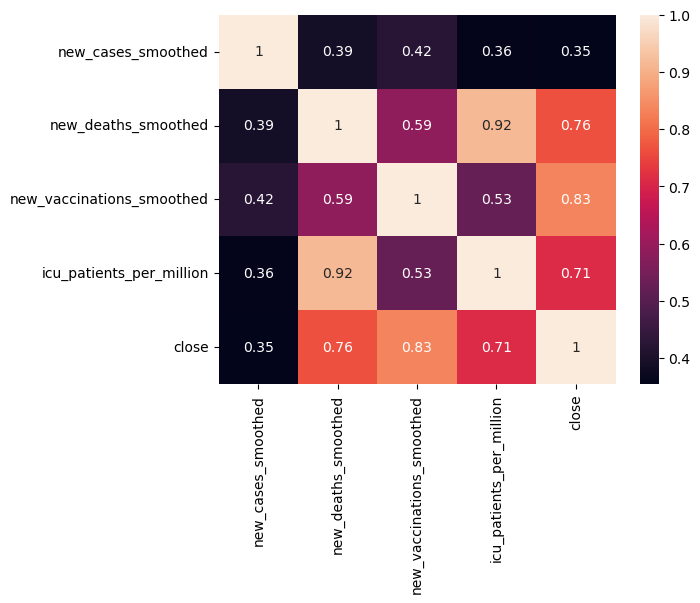

In [575]:
sns.heatmap(covid_dax_ger_corr, annot=True)

<h3>Testing if aggregating the stock data by sum would change the correlation effects</h3>

In [579]:
df_dax_mean2 = df_100_ger_combined.groupby(['year',"date", "yearly_week"]).agg({
    'close': 'sum',
    }).reset_index()

# Mergin COVID variables DF with DAX mean
covid_dax2 = pd.merge(weekly_covid_df,df_dax_mean2 , on=['yearly_week'], how='inner')
covid_dax2 = covid_dax2.drop(columns = ["year_x", "year_y"])

covid_dax2[covid_dax2["location"]== "Germany"]
covid_dax_ger2 = covid_dax2.groupby(["yearly_week",]).agg({
    "new_cases_smoothed":"sum",
    "new_deaths_smoothed": "sum", 
    "new_vaccinations_smoothed":"sum" , 
    "icu_patients_per_million": "sum",
    "close":"mean"}).reset_index()
covid_dax_ger2

,yearly_week,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,close
0,2020_W1,0.000,0.000,0.0,0.000,17260.223505
1,2020_W10,49867.230,2670.725,0.0,232.135,16337.628771
2,2020_W11,129764.440,4677.120,0.0,832.635,14682.010978
3,2020_W12,381374.410,18300.835,0.0,3166.365,12931.914563
4,2020_W13,985285.145,57475.895,0.0,9897.820,13634.397313
...,...,...,...,...,...,...
237,2024_W5,569291.495,14746.385,385035.0,536.520,16678.303066
238,2024_W6,492922.260,12271.485,324500.0,478.815,16572.561635
239,2024_W7,437132.855,10950.080,234445.0,412.425,16650.843722
240,2024_W8,392326.370,9209.445,224165.0,379.285,16586.929180


<Axes: >

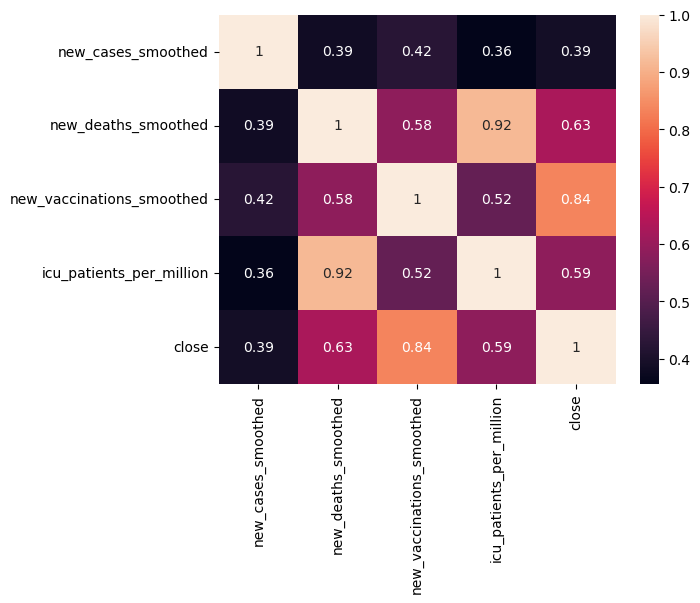

In [581]:
covid_dax_ger_corr2 = covid_dax_ger2.drop(columns=["yearly_week"]).corr()
sns.heatmap(covid_dax_ger_corr2, annot=True)

In [583]:
# Testing significance of correlation

from scipy.stats import pearsonr

x = covid_dax_ger["new_cases_smoothed"]
y = covid_dax_ger["close"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')
    

Pearson Correlation Coefficient: 0.3543564686282454
P-Value: 1.4365653555066927e-08
The correlation is statistically significant.


In [585]:
# Testing significance of correlation

from scipy.stats import pearsonr

x = covid_dax_ger["new_deaths_smoothed"]
y = covid_dax_ger["close"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: 0.764759728857605
P-Value: 1.0239129775047243e-47
The correlation is statistically significant.


In [587]:
# Testing significance of correlation

from scipy.stats import pearsonr

x = covid_dax_ger["new_vaccinations_smoothed"]
y = covid_dax_ger["close"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: 0.8335903121522429
P-Value: 8.459686401880789e-64
The correlation is statistically significant.


In [589]:
# Testing significance of correlation

from scipy.stats import pearsonr

x = covid_dax_ger["icu_patients_per_million"]
y = covid_dax_ger["close"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: 0.7110558839624208
P-Value: 1.4031580156133155e-38
The correlation is statistically significant.


In [591]:
# Testing significance of correlation

from scipy.stats import pearsonr

x = covid_dax_ger["new_cases_smoothed"]
y = covid_dax_ger["close"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: 0.3543564686282454
P-Value: 1.4365653555066927e-08
The correlation is statistically significant.


In [593]:
import statsmodels.api as sm

X = covid_dax_ger[['new_cases_smoothed']]
Y = covid_dax_ger['close']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     34.46
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.44e-08
Time:                        11:04:08   Log-Likelihood:                -800.82
No. Observations:                 242   AIC:                             1606.
Df Residuals:                     240   BIC:                             1613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 52.7122      0

<h3>Testing effects for 2021 & 2022 only</h3>

In [595]:
# Mergin COVID variables DF with DAX mean
covid_dax_21_22 = pd.merge(weekly_covid_df, df_dax_mean_no_outliers, on=['yearly_week'], how='inner')
covid_dax_21_22 = covid_dax_21_22.drop(columns = ["year_x", "Z-Score"])
covid_dax_21_22[covid_dax_21_22["location"]== "Germany"]
covid_dax_21_22_ger = covid_dax_21_22.groupby(["year_y","yearly_week",]).agg({
    "new_cases_smoothed":"sum",
    "new_deaths_smoothed": "sum", 
    "new_vaccinations_smoothed":"sum" , 
    "icu_patients_per_million": "sum",
    "close":"mean"}).reset_index()
covid_dax_21_22_ger = covid_dax_21_22_ger[covid_dax_21_22_ger["year_y"]>2020][covid_dax_21_22_ger["year_y"]<2024]
covid_dax_21_22_ger.drop(columns=["year_y", "yearly_week"]).corr()

/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_1409/48339726.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_dax_21_22_ger = covid_dax_21_22_ger[covid_dax_21_22_ger["year_y"]>2020][covid_dax_21_22_ger["year_y"]<2024]


,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,close
new_cases_smoothed,1.000000,0.319184,0.308359,0.276764,0.235654
new_deaths_smoothed,0.319184,1.000000,0.674645,0.925405,0.812435
new_vaccinations_smoothed,0.308359,0.674645,1.000000,0.584611,0.868800
icu_patients_per_million,0.276764,0.925405,0.584611,1.000000,0.771391
close,0.235654,0.812435,0.868800,0.771391,1.000000


<Axes: >

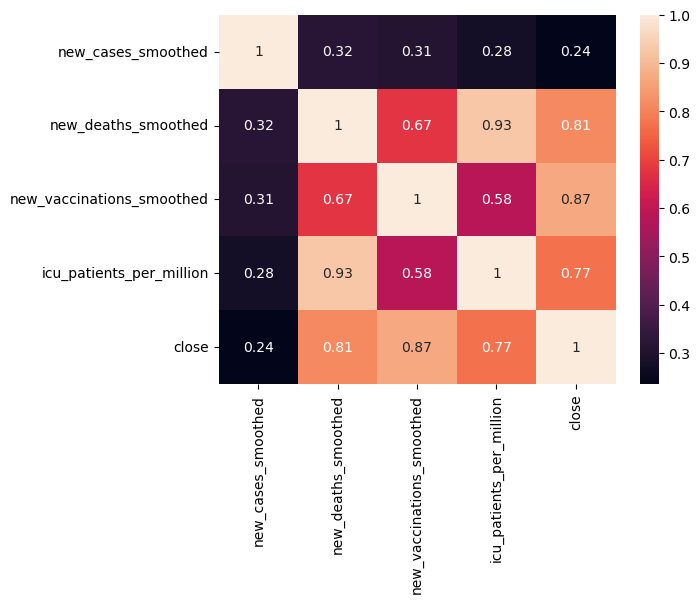

In [597]:
sns.heatmap(covid_dax_21_22_ger.drop(columns=["year_y", "yearly_week"]).corr(), annot=True)

In [599]:
# Testing significance of correlation

from scipy.stats import pearsonr

x = covid_dax_21_22_ger["new_deaths_smoothed"]
y = covid_dax_21_22_ger["close"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: 0.8124347441591117
P-Value: 6.534334158825839e-38
The correlation is statistically significant.


<h2>Testing for Hypothesis - Differnece in effects of Covid on different industies</h2>

In [495]:
industry_data_dax

industry,Advertising Agencies,Aerospace & Defense,Agricultural Inputs,Airlines,Airports & Air Services,Apparel Manufacturing,Asset Management,Auto & Truck Dealerships,Auto Manufacturers,Auto Parts,...,Textile Manufacturing,Thermal Coal,Tools & Accessories,Travel Services,Unknown,Utilities - Diversified,Utilities - Independent Power Producers,Utilities - Regulated Electric,Utilities - Renewable,Waste Management
yearly_week,,,,,,,,,,,,,,,,,,,,,
2019_W1,17.818399,125.870174,32.299523,11.196473,75.779999,35.896408,10.057815,NaN,61.696094,30.341039,...,12.770423,17.728483,19.872155,29.486866,119.337284,194.207265,289.255554,418.806458,10.492516,44.867790
2019_W40,17.256215,122.879509,33.786873,9.507792,76.339996,38.626396,9.452600,NaN,52.768475,26.740968,...,13.758232,17.821302,19.973880,26.700191,117.759621,163.947604,295.992582,347.520264,9.286953,52.852730
2019_W41,87.425275,612.757221,165.776096,49.060475,380.099991,181.564800,48.550798,NaN,270.317949,133.103561,...,68.650212,89.849058,100.320661,134.900785,589.455549,822.898155,1373.295263,1742.947815,48.225183,260.081097
2019_W42,86.861555,599.544710,164.371138,51.990936,379.359993,153.509842,48.329639,NaN,292.797412,137.431988,...,68.462279,90.034695,100.497091,154.640783,591.272228,819.297251,1385.035614,1753.640869,50.010275,257.799686
2019_W43,87.129064,592.725279,168.616643,54.112875,375.559998,155.136208,49.239984,NaN,301.554623,141.868521,...,68.180381,90.034695,99.855992,153.085426,591.569384,837.187566,1392.585289,1769.680267,49.852585,253.997322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024_W5,88.767953,608.153048,160.872800,37.141557,273.579998,282.554897,74.717946,19.431,378.495936,150.450324,...,48.950980,108.006201,114.264860,31.790000,337.361511,797.379347,246.659998,1925.558350,136.285683,50.670000
2024_W6,87.590140,616.188817,155.970896,36.619568,269.899998,282.515991,72.789895,18.644,385.195196,149.622019,...,47.356863,108.777674,114.344164,31.944000,342.980000,765.381491,247.240002,1964.380066,132.637324,48.379999
2024_W7,89.810874,665.332557,149.586266,35.610962,258.400002,305.663475,74.250860,18.661,389.606071,151.070854,...,46.764705,109.934883,114.531296,32.886000,330.374999,752.199017,242.970005,1950.792450,129.029490,50.540001


In [603]:
# Display the filtered DataFrame
covid_dax_industries = pd.merge(covid_dax_ger, industry_data_dax, on=["yearly_week"], how='inner')
covid_dax_industries_filtered = covid_dax_industries[['Aerospace & Defense',"Drug Manufacturers - General",  'Drug Manufacturers - Specialty & Generic','Biotechnology', 'Medical Care Facilities',  'Software - Application', 'Airlines','new_cases_smoothed', "new_deaths_smoothed","icu_patients_per_million","new_vaccinations_smoothed"]]

In [605]:
covid_dax_industries_filtered_corr = covid_dax_industries_filtered.corr()
covid_dax_industries_filtered_corr

,Aerospace & Defense,Drug Manufacturers - General,Drug Manufacturers - Specialty & Generic,Biotechnology,Medical Care Facilities,Software - Application,Airlines,new_cases_smoothed,new_deaths_smoothed,icu_patients_per_million,new_vaccinations_smoothed
Aerospace & Defense,1.000000,-0.335365,-0.167987,-0.575381,-0.505226,0.296345,0.316380,-0.379455,-0.667651,-0.652272,-0.494859
Drug Manufacturers - General,-0.335365,1.000000,0.233140,0.145575,0.337520,-0.543070,0.444046,0.161056,0.116077,0.024227,0.086070
Drug Manufacturers - Specialty & Generic,-0.167987,0.233140,1.000000,0.637161,0.120920,0.105986,0.096380,0.378967,0.262917,0.259979,0.722078
Biotechnology,-0.575381,0.145575,0.637161,1.000000,0.542744,0.143361,-0.138876,0.316299,0.773732,0.722744,0.832418
Medical Care Facilities,-0.505226,0.337520,0.120920,0.542744,1.000000,0.107052,-0.158948,0.119271,0.720438,0.610272,0.460235
Software - Application,0.296345,-0.543070,0.105986,0.143361,0.107052,1.000000,-0.163808,-0.166071,0.045600,0.047949,0.169207
Airlines,0.316380,0.444046,0.096380,-0.138876,-0.158948,-0.163808,1.000000,-0.116380,-0.231749,-0.210627,-0.200026
new_cases_smoothed,-0.379455,0.161056,0.378967,0.316299,0.119271,-0.166071,-0.116380,1.000000,0.388491,0.358321,0.424932
new_deaths_smoothed,-0.667651,0.116077,0.262917,0.773732,0.720438,0.045600,-0.231749,0.388491,1.000000,0.916507,0.588101
icu_patients_per_million,-0.652272,0.024227,0.259979,0.722744,0.610272,0.047949,-0.210627,0.358321,0.916507,1.000000,0.525502


<Axes: >

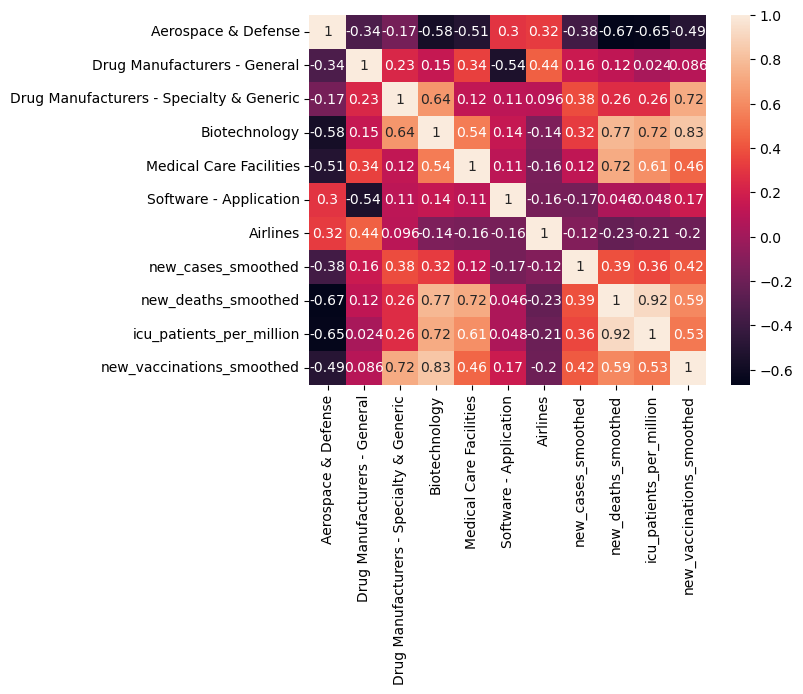

In [607]:
sns.heatmap(covid_dax_industries_filtered_corr, annot=True)

In [609]:
x = covid_dax_industries_filtered["Biotechnology"]
y = covid_dax_industries_filtered["new_deaths_smoothed"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: 0.7737318840144111
P-Value: 1.749671964959428e-49
The correlation is statistically significant.


<h1>BASE DATA FRAME TO USE ON ALL INDUSTRIES AND HYPOTHESIS FOR DAX BY COMPANY<h1></h1>

LOADING AND PREPARING SP 500 DATA

In [336]:
# Import data source about USA's top publicly listed companies
df_sp_500 = pd.read_csv("sp500_companies.csv") 


In [338]:
df_sp_500_ind = []

for company in df_sp_500["Symbol"]:
    stock = yf.Ticker(company) # Download data for a specific stock 
    info = stock.info
    stockinfo = stock.history(period="5y") # Get historical market data
    industry = info.get("industry", "Unknown")
    sector = info.get("sector", "Unknown")  
    stockinfo["Industry"] = industry
    stockinfo["Sector"] = sector
    stockinfo['Trading Symbol'] = company
    stockinfo['Company Name'] = df_sp_500[df_sp_500['Symbol'] == company]['Shortname'].values[0]
    df_sp_500_ind.append(stockinfo[['Trading Symbol', 'Company Name', 'Close', "Industry", "Sector"]])

df_sp_500_combined = pd.concat(df_sp_500_ind, axis=0)
df_sp_500_combined.reset_index(inplace=True)

GEV: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']
KVUE: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']
GEHC: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']
VLTO: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']
SW: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']
SOLV: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']
/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_1409/258527094.py:15: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_sp_500_combined = pd.concat(df_sp_500_ind, axis=0)


In [344]:
df_sp_500 = df_sp_500_combined.groupby("Date").agg({"Close": "mean"}).dropna().reset_index()

df_sp_500_all = df_sp_500_combined.groupby(["Industry", "Date"]).agg({"Close": "mean"}).dropna().reset_index()


,Industry,Date,Close
0,Advertising Agencies,2019-10-07 00:00:00-04:00,40.744449
1,Advertising Agencies,2019-10-08 00:00:00-04:00,39.554130
2,Advertising Agencies,2019-10-09 00:00:00-04:00,39.413633
3,Advertising Agencies,2019-10-10 00:00:00-04:00,38.623575
4,Advertising Agencies,2019-10-11 00:00:00-04:00,39.342907
...,...,...,...
141573,Waste Management,2024-09-30 00:00:00-04:00,203.930634
141574,Waste Management,2024-10-01 00:00:00-04:00,204.314995
141575,Waste Management,2024-10-02 00:00:00-04:00,203.705002
141576,Waste Management,2024-10-03 00:00:00-04:00,205.494995


In [7]:
# df_sp_500_combined = pd.read_csv('df_sp_500_combined.csv')


In [346]:

# Convert 'Date' column to datetime format if it's not already
df_sp_500_all['Date'] = pd.to_datetime(df_sp_500_all['Date'])

# Add a 'week' column to extract the calendar week number
df_sp_500_all['week'] = df_sp_500_all['Date'].dt.isocalendar().week
df_sp_500_all['year'] = df_sp_500_all['Date'].dt.year
# Add a 'month' column to extract the month number
df_sp_500_all['month'] = df_sp_500_all['Date'].dt.month

df_sp_500_all["Date"] = df_sp_500_all["Date"].apply(lambda x: x.strftime('%Y-%m-%d'))

#make new column called yearly_week
df_sp_500_all['yearly_week'] = df_sp_500_all['year'].astype(str) + '_W' + df_sp_500_all['week'].astype(str)
df_sp_500_all

,Industry,Date,Close,week,year,month,yearly_week
0,Advertising Agencies,2019-10-07,40.744449,41,2019,10,2019_W41
1,Advertising Agencies,2019-10-08,39.554130,41,2019,10,2019_W41
2,Advertising Agencies,2019-10-09,39.413633,41,2019,10,2019_W41
3,Advertising Agencies,2019-10-10,38.623575,41,2019,10,2019_W41
4,Advertising Agencies,2019-10-11,39.342907,41,2019,10,2019_W41
...,...,...,...,...,...,...,...
141573,Waste Management,2024-09-30,203.930634,40,2024,9,2024_W40
141574,Waste Management,2024-10-01,204.314995,40,2024,10,2024_W40
141575,Waste Management,2024-10-02,203.705002,40,2024,10,2024_W40
141576,Waste Management,2024-10-03,205.494995,40,2024,10,2024_W40


In [242]:
# Convert 'Date' column to datetime format if it's not already
df_sp_500['Date'] = pd.to_datetime(df_sp_500['Date'])

# Add a 'week' column to extract the calendar week number
df_sp_500['week'] = df_sp_500['Date'].dt.isocalendar().week
df_sp_500['year'] = df_sp_500['Date'].dt.year
# Add a 'month' column to extract the month number
df_sp_500['month'] = df_sp_500['Date'].dt.month

df_sp_500["Date"] = df_sp_500["Date"].apply(lambda x: x.strftime('%Y-%m-%d'))

#make new column called yearly_week
df_sp_500['yearly_week'] = df_sp_500['year'].astype(str) + '_W' + df_sp_500['week'].astype(str)
df_sp_500

df_sp_500

,Date,Close,week,year,month,yearly_week
0,2019-10-07,108.861389,41,2019,10,2019_W41
1,2019-10-08,107.282873,41,2019,10,2019_W41
2,2019-10-09,108.137069,41,2019,10,2019_W41
3,2019-10-10,108.684736,41,2019,10,2019_W41
4,2019-10-11,109.719326,41,2019,10,2019_W41
...,...,...,...,...,...,...
1253,2024-09-30,223.760885,40,2024,9,2024_W40
1254,2024-10-01,222.593622,40,2024,10,2024_W40
1255,2024-10-02,222.221618,40,2024,10,2024_W40
1256,2024-10-03,220.989263,40,2024,10,2024_W40


In [250]:
'''
# Calculate Z-scores
df_sp_500_combined['Z-Score'] = (df_sp_500_combined["Close"]  - df_sp_500_combined["Close"] .mean()) / df_sp_500_combined["Close"] .std()
# Identify outliers (threshold can be adjusted)
threshold = 3
outliers = df_sp_500_combined[df_sp_500_combined['Z-Score'].abs() > threshold]


# Remove outliers based on Z-score
df_sp_500_combined_no_outliers = df_sp_500_combined[df_sp_500_combined['Z-Score'].abs() <= threshold]

'''

In [280]:
df_sp_500_mean_weekly = df_sp_500.drop(columns=["Date", "year", "week", "month"]).groupby(["yearly_week"]).agg({"Close":"mean"}).reset_index()

df_sp_500_mean_weekly

,yearly_week,Close
0,2019_W1,118.650079
1,2019_W41,108.537079
2,2019_W42,110.543532
3,2019_W43,111.149040
4,2019_W44,112.327956
...,...,...
257,2024_W5,192.415122
258,2024_W6,194.563365
259,2024_W7,195.730474
260,2024_W8,196.834992


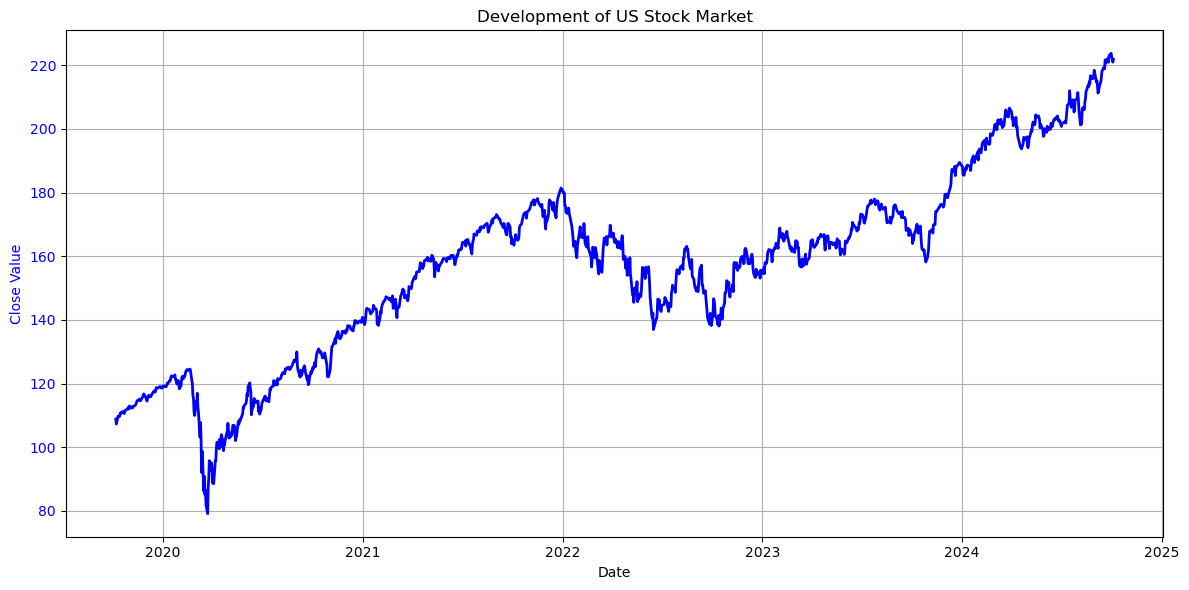

In [563]:
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot Variable1 on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Value', color='blue')
ax1.plot(df_sp_500["Date"], df_sp_500["Close"], color='blue', label='Close Value', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')
# Add title and grid
plt.title('Development of US Stock Market')
ax1.grid()
# Show the plot
plt.tight_layout()
plt.show()

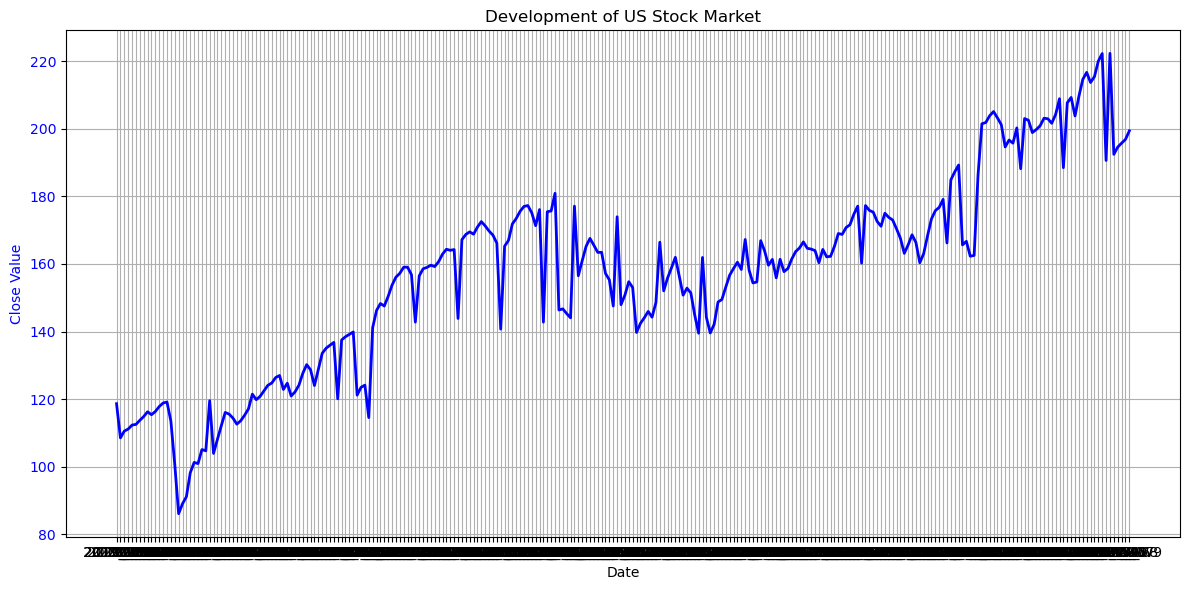

In [282]:
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot Variable1 on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Value', color='blue')
ax1.plot(df_sp_500["yearly_week"], df_sp_500["Close"], color='blue', label='Close Value', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')

# Add title and grid
plt.title('Development of US Stock Market')
ax1.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [705]:
df_sp_500

,Date,Close
0,2019-10-07 00:00:00-04:00,108.861388
1,2019-10-08 00:00:00-04:00,107.282873
2,2019-10-09 00:00:00-04:00,108.137070
3,2019-10-10 00:00:00-04:00,108.684735
4,2019-10-11 00:00:00-04:00,109.719326
...,...,...
1253,2024-09-30 00:00:00-04:00,223.760885
1254,2024-10-01 00:00:00-04:00,222.593622
1255,2024-10-02 00:00:00-04:00,222.221618
1256,2024-10-03 00:00:00-04:00,220.989263


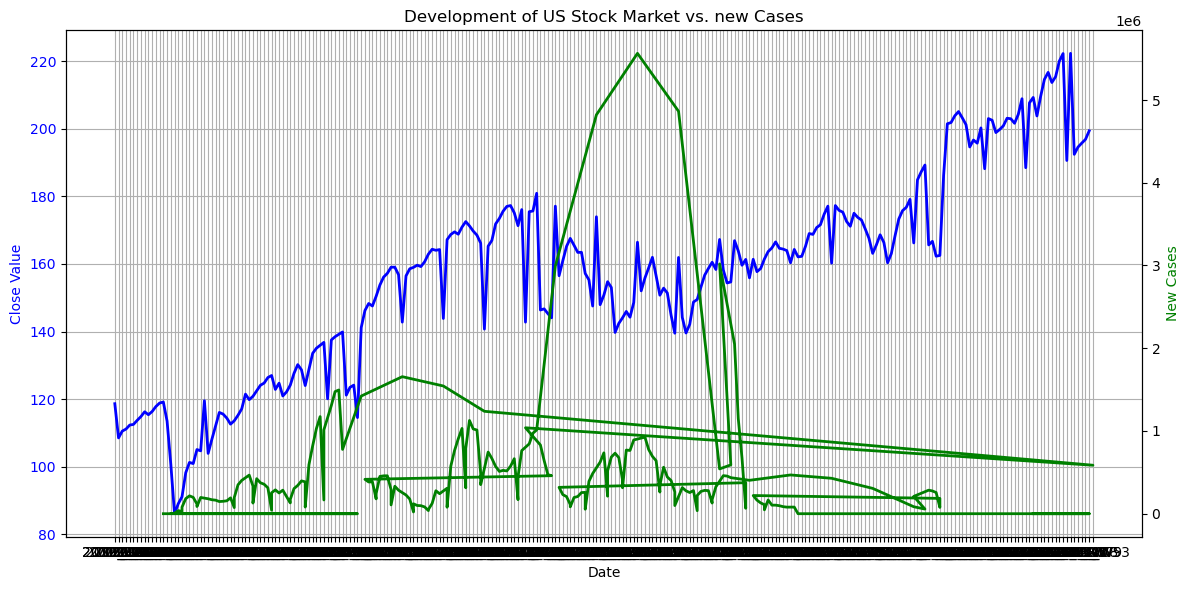

In [709]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Value', color='blue')
ax1.plot(df_sp_500_mean_weekly["yearly_week"], df_sp_500_mean_weekly["Close"], color='blue', label='Close Value', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_xlabel('Date')
ax2.set_ylabel('New Cases', color='green')
ax2.plot(weekly_covid_df[weekly_covid_df["location"]=="United States"]["yearly_week"], weekly_covid_df[weekly_covid_df["location"]=="United States"]
["new_cases_smoothed"], color='green', label='New Cases', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')


# Add title and grid
plt.title('Development of US Stock Market vs. new Cases')
ax1.grid()

# Show the plot
plt.tight_layout()
plt.show()

<h2>Comparing Covid Variables with S&P500<h2>

In [611]:
weekly_covid_df_us = weekly_covid_df[weekly_covid_df["location"]=="United States"]
weekly_covid_df_us


,continent,location,year,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,yearly_week
57166,North America,United States,2020,0.0,0.000,0.0,0.0,2020_W1
57167,North America,United States,2020,0.0,0.000,0.0,0.0,2020_W2
57168,North America,United States,2020,0.0,0.000,0.0,0.0,2020_W3
57169,North America,United States,2020,1.0,0.000,0.0,0.0,2020_W4
57170,North America,United States,2020,5.0,0.000,0.0,0.0,2020_W5
...,...,...,...,...,...,...,...,...
57447,North America,United States,2024,0.0,449.998,0.0,0.0,2024_W28
57448,North America,United States,2024,0.0,487.141,0.0,0.0,2024_W29
57449,North America,United States,2024,0.0,573.571,0.0,0.0,2024_W30
57450,North America,United States,2024,0.0,265.287,0.0,0.0,2024_W31


In [617]:
# Create a third y-axis for Variable3
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move third axis outward
ax3.set_ylabel('Deaths', color='green')
ax3.plot(weekly_covid_df_us["yearly_week"], weekly_covid_df_us["new_deaths_smoothed"], color='green', label='Closing Value', linewidth=2)
ax3.tick_params(axis='y', labelcolor='green')

# Create a third y-axis for Variable4
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 60))  # Move third axis outward
ax4.set_ylabel('ICU Patients', color='yellow')
ax4.plot(weekly_covid_df_us["yearly_week"], weekly_covid_df_us["icu_patients_per_million"], color='yellow', label='Closing Value', linewidth=2)
ax4.tick_params(axis='y', labelcolor='green')


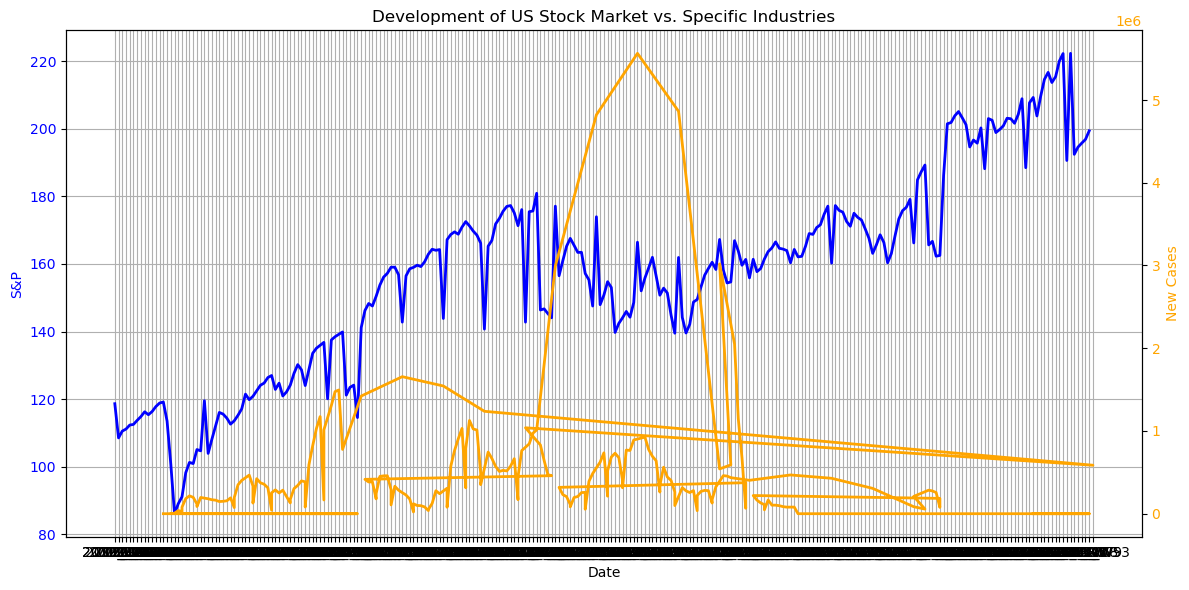

In [619]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Variable1 on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P', color='blue')
ax1.plot(df_sp_500_mean_weekly["yearly_week"], df_sp_500_mean_weekly["Close"], color='blue', label='Close Value', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')


# Create a second y-axis for Variable2
ax2 = ax1.twinx()
ax2.set_ylabel('New Cases', color='orange')
ax2.plot(weekly_covid_df_us["yearly_week"], weekly_covid_df_us["new_cases_smoothed"], color='orange', label='Airlines', linewidth=2)
ax2.tick_params(axis='y', labelcolor='orange')


# Add title and grid

plt.title('Development of US Stock Market vs. Specific Industries')
ax1.grid()

# Show the plot
plt.tight_layout()
plt.show()


<h1>Hypothesis Testing - Impact of Covid variables on S&P 500<h1>

In [627]:
covid_sp500 = pd.merge(weekly_covid_df_us, df_sp_500_mean_weekly, on=["yearly_week"], how='inner')
covid_sp500 = covid_sp500.drop(columns=["location", "continent","year", "yearly_week"])
covid_sp500

,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,Close
0,0.0,0.000,0.0,0.0,119.148193
1,0.0,0.000,0.0,0.0,119.533342
2,0.0,0.000,0.0,0.0,121.478222
3,1.0,0.000,0.0,0.0,122.149892
4,5.0,0.000,0.0,0.0,120.091892
...,...,...,...,...,...
280,0.0,449.998,0.0,0.0,204.230649
281,0.0,487.141,0.0,0.0,208.864168
282,0.0,573.571,0.0,0.0,207.656821
283,0.0,265.287,0.0,0.0,209.245194


In [629]:
covid_sp500_corr = covid_sp500.corr()
covid_sp500_corr

,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,Close
new_cases_smoothed,1.000000,0.626196,0.305469,0.730118,-0.044085
new_deaths_smoothed,0.626196,1.000000,0.422052,0.804394,-0.243926
new_vaccinations_smoothed,0.305469,0.422052,1.000000,0.464805,0.025147
icu_patients_per_million,0.730118,0.804394,0.464805,1.000000,-0.053375
Close,-0.044085,-0.243926,0.025147,-0.053375,1.000000


<Axes: >

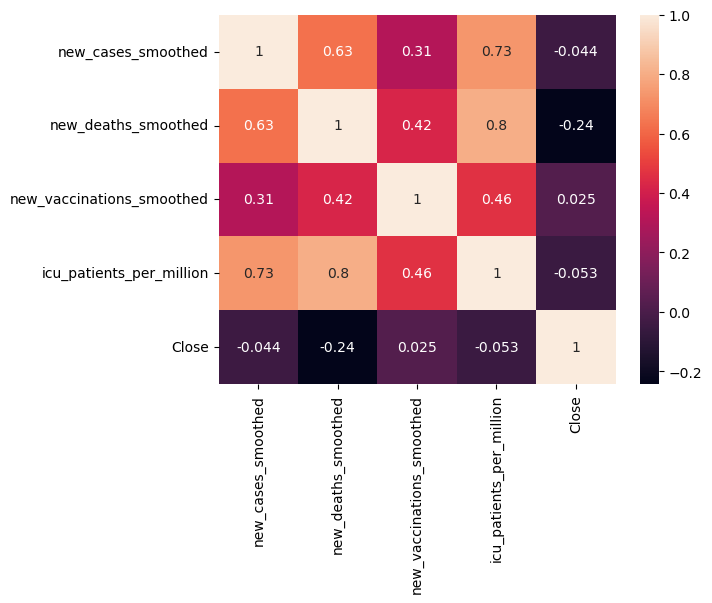

In [631]:
sns.heatmap(covid_sp500_corr, annot=True)

In [633]:
# Testing significance of correlation

from scipy.stats import pearsonr

x = covid_sp500["new_cases_smoothed"]
y = covid_sp500["Close"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: -0.04408541008656425
P-Value: 0.45848910827538575
The correlation is not statistically significant.


In [635]:
# Testing significance of correlation

x = covid_sp500["new_deaths_smoothed"]
y = covid_sp500["Close"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: -0.2439260443878052
P-Value: 3.142314098374457e-05
The correlation is statistically significant.


<h1>BASE DATA FRAME TO USE ON ALL INDUSTRIES AND HYPOTHESIS FOR SP500 BY INDUSTRY<h1>

In [637]:
df_sp_500_all

# industry_data_sp500.pivot
industry_data_sp500 = pd.pivot_table(df_sp_500_all, values="Close", index="yearly_week", columns="Industry", aggfunc="mean", fill_value=None, margins=False, dropna=False, margins_name='All', sort=True)
industry_data_sp500

Industry,Advertising Agencies,Aerospace & Defense,Agricultural Inputs,Airlines,Apparel Manufacturing,Apparel Retail,Asset Management,Auto & Truck Dealerships,Auto Manufacturers,Auto Parts,...,Travel Services,Trucking,Unknown,Utilities - Diversified,Utilities - Independent Power Producers,Utilities - Regulated Electric,Utilities - Regulated Gas,Utilities - Regulated Water,Utilities - Renewable,Waste Management
yearly_week,,,,,,,,,,,,,,,,,,,,,
2019_W1,43.584990,194.746064,44.602165,65.633718,106.313831,133.316746,97.134831,87.549999,23.517285,64.202695,...,477.465536,61.845587,132.731247,40.946883,26.829629,58.284638,60.984819,113.092144,NaN,94.306107
2019_W41,39.535739,187.320347,39.396617,62.896744,82.379388,117.540827,81.492098,87.189999,18.714404,55.460234,...,452.682953,54.207153,108.631433,37.783708,28.337559,58.137220,61.364888,113.952628,NaN,93.322652
2019_W42,39.954094,187.026957,40.052312,63.964269,84.997826,122.420680,85.085857,92.380000,19.674521,58.431419,...,467.052815,57.168195,116.600548,37.770094,28.521481,57.363603,60.826581,111.558401,NaN,93.396686
2019_W43,40.605603,183.694419,39.353352,65.049661,88.265445,122.472798,87.998491,94.943999,20.151176,60.217905,...,471.711140,59.753472,121.371756,38.354138,29.081797,58.073170,61.458238,111.752580,NaN,92.887355
2019_W44,41.175745,186.266516,41.028351,66.584156,87.607220,121.160711,90.358423,94.625999,21.359426,61.149954,...,474.131795,60.916065,126.619864,37.772322,29.025404,57.307038,60.932246,111.041808,NaN,91.933888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024_W5,60.381558,285.675135,52.917386,36.876908,144.057776,235.090036,168.340720,72.501999,79.422211,76.036585,...,663.576303,197.704968,303.870276,43.313490,47.560131,59.527866,68.750751,122.474344,123.781779,178.028825
2024_W6,58.160889,291.130270,52.519882,37.267455,155.717270,234.164715,169.361649,72.642001,79.051920,75.081308,...,689.734684,213.434711,318.908002,42.134213,47.670335,58.149232,67.372445,120.385251,129.988475,179.779272
2024_W7,57.786613,292.744807,52.597505,38.503701,176.266504,232.967381,170.731141,73.692000,80.913433,74.962660,...,693.022740,213.137903,316.782440,42.300388,47.721245,58.788480,68.139240,120.854092,128.858540,185.603654


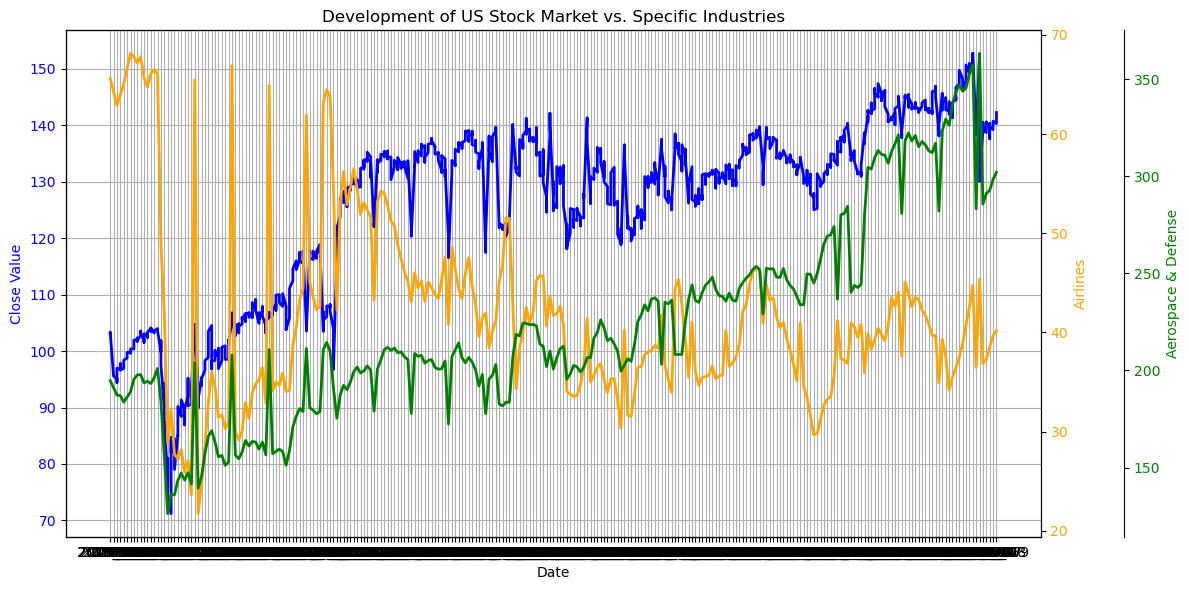

In [639]:
# Visualize the development of Airline Industry and Pharma Industry against S&P 500

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Variable1 on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Value', color='blue')
ax1.plot(df_sp_500_mean["yearly_week"], df_sp_500_mean["Close"], color='blue', label='Close Value', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Variable2
ax2 = ax1.twinx()
ax2.set_ylabel('Airlines', color='orange')
ax2.plot(industry_data_sp500.index, industry_data_sp500["Airlines"], color='orange', label='Airlines', linewidth=2)
ax2.tick_params(axis='y', labelcolor='orange')

# Create a third y-axis for Variable3
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move third axis outward
ax3.set_ylabel('Aerospace & Defense', color='green')
ax3.plot(industry_data_sp500.index, industry_data_sp500["Aerospace & Defense"], color='green', label='Closing Value', linewidth=2)
ax3.tick_params(axis='y', labelcolor='green')

# Add title and grid
plt.title('Development of US Stock Market vs. Specific Industries')
ax1.grid()

# Show the plot
plt.tight_layout()
plt.show()


<h1>BASE DATA FRAME TO USE ON ALL INDUSTRIES AND HYPOTHESIS FOR SP500 BY COMPANY<h1>


In [35]:
industry_data_sp500 = industry_data_sp500.reset_index()

In [659]:
# Merge the COVID-19 and industry data on 'year' and 'week'
covid_sp500_industries = pd.merge(weekly_covid_df_us, industry_data_sp500, on=["yearly_week"], how='inner')

#list(covid_sp500_industries.columns)
covid_sp500_industries

,continent,location,year,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,yearly_week,Advertising Agencies,Aerospace & Defense,...,Travel Services,Trucking,Unknown,Utilities - Diversified,Utilities - Independent Power Producers,Utilities - Regulated Electric,Utilities - Regulated Gas,Utilities - Regulated Water,Utilities - Renewable,Waste Management
0,North America,United States,2020,0.0,0.000,0.0,0.0,2020_W1,42.984233,201.014820,...,481.112003,62.429371,134.426369,40.319299,26.433512,57.655225,60.633621,110.921368,NaN,94.916065
1,North America,United States,2020,0.0,0.000,0.0,0.0,2020_W2,42.905710,204.079342,...,480.121127,62.642287,132.342783,40.588150,25.797684,57.842526,60.962651,111.469574,NaN,95.764577
2,North America,United States,2020,0.0,0.000,0.0,0.0,2020_W3,43.359482,207.996683,...,480.302288,67.249147,132.327771,41.691068,26.132468,59.462164,62.490421,116.670250,NaN,97.939486
3,North America,United States,2020,1.0,0.000,0.0,0.0,2020_W4,43.021355,210.781807,...,463.434980,66.887089,129.408375,42.772583,26.298278,61.402021,63.992951,123.794270,NaN,99.651890
4,North America,United States,2020,5.0,0.000,0.0,0.0,2020_W5,41.582671,211.315643,...,439.406536,65.726389,122.246651,42.854067,25.425732,62.247771,64.041208,125.106862,NaN,100.332370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,North America,United States,2024,0.0,449.998,0.0,0.0,2024_W28,59.600801,312.128021,...,741.998984,183.468768,328.725244,46.819958,85.283755,65.011871,72.826441,132.916901,216.640475,203.712238
281,North America,United States,2024,0.0,487.141,0.0,0.0,2024_W29,60.912732,316.995895,...,749.767557,197.476044,352.127930,46.745714,77.120408,66.553477,76.052191,139.338260,195.837225,211.800311
282,North America,United States,2024,0.0,573.571,0.0,0.0,2024_W30,60.931486,323.413829,...,710.486449,198.217056,344.572003,47.482844,74.485201,67.908424,77.464680,140.541763,179.833032,203.322427
283,North America,United States,2024,0.0,265.287,0.0,0.0,2024_W31,63.001363,329.405607,...,678.978569,202.735016,336.967999,48.720671,73.217773,70.631531,79.627056,143.076093,174.838336,198.802283


<h2>FILERING BY INDUSTRY AND LOCATION <h2>

In [49]:
covid_sp500_industries.columns.tolist()

['continent',
 'location',
 'year',
 'month',
 'week',
 'new_cases',
 'new_deaths',
 'new_vaccinations',
 'icu_patients',
 'yearly_week',
 'Advertising Agencies',
 'Aerospace & Defense',
 'Agricultural Inputs',
 'Airlines',
 'Apparel Manufacturing',
 'Apparel Retail',
 'Asset Management',
 'Auto & Truck Dealerships',
 'Auto Manufacturers',
 'Auto Parts',
 'Banks - Diversified',
 'Banks - Regional',
 'Banks—Regional',
 'Beverages - Brewers',
 'Beverages - Non-Alcoholic',
 'Beverages—Brewers',
 'Beverages—Wineries & Distilleries',
 'Biotechnology',
 'Building Materials',
 'Building Products & Equipment',
 'Capital Markets',
 'Chemicals',
 'Communication Equipment',
 'Computer Hardware',
 'Confectioners',
 'Conglomerates',
 'Consulting Services',
 'Consumer Electronics',
 'Copper',
 'Credit Services',
 'Diagnostics & Research',
 'Discount Stores',
 'Drug Manufacturers - General',
 'Drug Manufacturers - Specialty & Generic',
 'Drug Manufacturers—Specialty & Generic',
 'Electrical Equipment

In [661]:
# Filter for 'location' as 'United States' and truthy values in 'Aerospace & Defense' and 'Airlines'
industries_us_covid = covid_sp500_industries[ covid_sp500_industries['location'] == 'United States' ][['Aerospace & Defense',"Drug Manufacturers - General",  'Drug Manufacturers - Specialty & Generic','Biotechnology', 'Medical Care Facilities',  'Software - Application', 'Airlines','new_cases_smoothed', "new_deaths_smoothed","icu_patients_per_million","new_vaccinations_smoothed"]]

# Display the filtered DataFrame
industries_us_covid.head()



,Aerospace & Defense,Drug Manufacturers - General,Drug Manufacturers - Specialty & Generic,Biotechnology,Medical Care Facilities,Software - Application,Airlines,new_cases_smoothed,new_deaths_smoothed,icu_patients_per_million,new_vaccinations_smoothed
0,201.014820,115.126137,67.839667,148.889278,118.712240,196.480829,66.071485,0.0,0.0,0.0,0.0
1,204.079342,115.338702,68.145057,150.891240,119.624795,200.266788,65.448589,0.0,0.0,0.0,0.0
2,207.996683,116.432044,70.968650,154.462203,120.571758,205.171847,66.900085,0.0,0.0,0.0,0.0
3,210.781807,114.728567,71.818429,148.417897,121.549770,209.764899,64.901290,1.0,0.0,0.0,0.0
4,211.315643,112.227687,71.142981,143.627159,119.582944,211.120223,61.919955,5.0,0.0,0.0,0.0


<h2>Hypothesis Testing - Difference in effect of COVID variables for different sectors<h2>

In [663]:
# check for correlation of different industries and Covid variables
industries_us_covid_corr = industries_us_covid.corr()
industries_us_covid_corr

,Aerospace & Defense,Drug Manufacturers - General,Drug Manufacturers - Specialty & Generic,Biotechnology,Medical Care Facilities,Software - Application,Airlines,new_cases_smoothed,new_deaths_smoothed,icu_patients_per_million,new_vaccinations_smoothed
Aerospace & Defense,1.000000,0.944413,-0.135802,0.834879,0.887650,0.813518,0.099160,-0.260840,-0.470438,-0.363539,-0.233614
Drug Manufacturers - General,0.944413,1.000000,-0.234952,0.900849,0.807761,0.773868,-0.141191,-0.296102,-0.471767,-0.402381,-0.303658
Drug Manufacturers - Specialty & Generic,-0.135802,-0.234952,1.000000,0.046129,0.219379,0.294472,0.286891,0.441465,0.418545,0.617907,0.487953
Biotechnology,0.834879,0.900849,0.046129,1.000000,0.819474,0.811618,-0.247594,-0.167020,-0.316047,-0.197305,-0.232776
Medical Care Facilities,0.887650,0.807761,0.219379,0.819474,1.000000,0.895449,0.245519,-0.083277,-0.239194,-0.073700,-0.010571
Software - Application,0.813518,0.773868,0.294472,0.811618,0.895449,1.000000,0.109006,-0.068966,-0.138106,0.040138,0.013623
Airlines,0.099160,-0.141191,0.286891,-0.247594,0.245519,0.109006,1.000000,0.041699,-0.013117,0.147981,0.426828
new_cases_smoothed,-0.260840,-0.296102,0.441465,-0.167020,-0.083277,-0.068966,0.041699,1.000000,0.626196,0.730118,0.305469
new_deaths_smoothed,-0.470438,-0.471767,0.418545,-0.316047,-0.239194,-0.138106,-0.013117,0.626196,1.000000,0.804394,0.422052
icu_patients_per_million,-0.363539,-0.402381,0.617907,-0.197305,-0.073700,0.040138,0.147981,0.730118,0.804394,1.000000,0.464805


<Axes: >

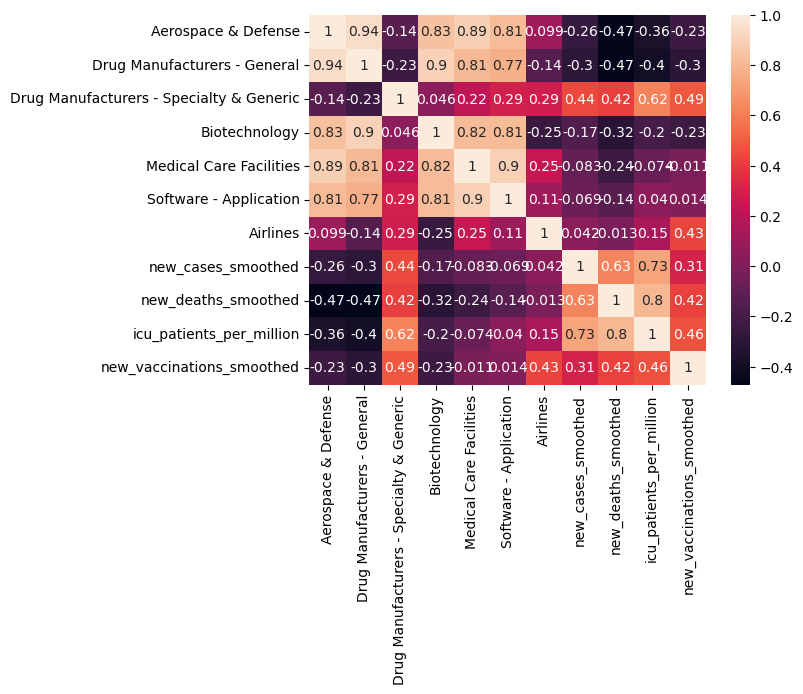

In [665]:
sns.heatmap(industries_us_covid_corr, annot=True)

In [667]:
x = industries_us_covid["Drug Manufacturers - Specialty & Generic"]
y = industries_us_covid["new_cases_smoothed"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: 0.44146514754600297
P-Value: 5.047594583082143e-15
The correlation is statistically significant.


In [669]:
x = industries_us_covid["Drug Manufacturers - Specialty & Generic"]
y = industries_us_covid["new_deaths_smoothed"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: 0.4185452706955294
P-Value: 1.628666808657465e-13
The correlation is statistically significant.


In [671]:
x = industries_us_covid["Aerospace & Defense"]
y = industries_us_covid["new_cases_smoothed"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: -0.26084007341208443
P-Value: 8.134614469187428e-06
The correlation is statistically significant.


In [675]:
x = industries_us_covid["Aerospace & Defense"]
y = industries_us_covid["new_deaths_smoothed"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: -0.4704381766263779
P-Value: 4.2255239403730094e-17
The correlation is statistically significant.


<h2>Testing for different effects in 2020</h2>

In [679]:
covid_sp500_industries_2020 = covid_sp500_industries[covid_sp500_industries["year"]==2020]
covid_sp500_industries_2020

,continent,location,year,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,yearly_week,Advertising Agencies,Aerospace & Defense,...,Travel Services,Trucking,Unknown,Utilities - Diversified,Utilities - Independent Power Producers,Utilities - Regulated Electric,Utilities - Regulated Gas,Utilities - Regulated Water,Utilities - Renewable,Waste Management
0,North America,United States,2020,0.000,0.000,0.0,0.000,2020_W1,42.984233,201.014820,...,481.112003,62.429371,134.426369,40.319299,26.433512,57.655225,60.633621,110.921368,NaN,94.916065
1,North America,United States,2020,0.000,0.000,0.0,0.000,2020_W2,42.905710,204.079342,...,480.121127,62.642287,132.342783,40.588150,25.797684,57.842526,60.962651,111.469574,NaN,95.764577
2,North America,United States,2020,0.000,0.000,0.0,0.000,2020_W3,43.359482,207.996683,...,480.302288,67.249147,132.327771,41.691068,26.132468,59.462164,62.490421,116.670250,NaN,97.939486
3,North America,United States,2020,1.000,0.000,0.0,0.000,2020_W4,43.021355,210.781807,...,463.434980,66.887089,129.408375,42.772583,26.298278,61.402021,63.992951,123.794270,NaN,99.651890
4,North America,United States,2020,5.000,0.000,0.0,0.000,2020_W5,41.582671,211.315643,...,439.406536,65.726389,122.246651,42.854067,25.425732,62.247771,64.041208,125.106862,NaN,100.332370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,North America,United States,2020,1013276.716,10650.144,0.0,409.717,2020_W49,37.923183,178.851347,...,462.960213,101.941653,162.586096,37.761298,23.190461,56.985061,54.392886,142.722900,NaN,100.802856
59,North America,United States,2020,1307724.859,15217.145,0.0,507.824,2020_W50,38.324611,180.768939,...,447.460770,100.478510,165.958020,37.644505,23.299099,56.240194,54.542547,139.098270,NaN,99.275591
60,North America,United States,2020,1475545.715,17878.569,759781.0,535.180,2020_W51,38.093658,179.551644,...,410.786149,96.909264,166.636108,38.524946,22.843446,55.857190,54.819040,140.876953,NaN,100.216142
61,North America,United States,2020,1495384.285,18789.858,1995040.0,553.250,2020_W52,36.852590,177.656938,...,410.515695,97.423235,165.520790,38.257787,23.494859,54.629401,51.378567,138.661076,NaN,100.120349


In [681]:
covid_sp500_industries_2020_filtered = covid_sp500_industries_2020[['Aerospace & Defense',"Drug Manufacturers - General",  'Drug Manufacturers - Specialty & Generic','Biotechnology', 'Medical Care Facilities', 'Software - Application', 'Airlines','new_cases_smoothed', "new_deaths_smoothed","icu_patients_per_million","new_vaccinations_smoothed"]]


In [683]:
industries_us_covid_2020_corr = covid_sp500_industries_2020_filtered.corr()
industries_us_covid_2020_corr

,Aerospace & Defense,Drug Manufacturers - General,Drug Manufacturers - Specialty & Generic,Biotechnology,Medical Care Facilities,Software - Application,Airlines,new_cases_smoothed,new_deaths_smoothed,icu_patients_per_million,new_vaccinations_smoothed
Aerospace & Defense,1.000000,0.080957,0.140587,-0.571538,0.755453,0.260756,0.955312,0.018230,-0.291402,0.056961,0.113984
Drug Manufacturers - General,0.080957,1.000000,0.164150,0.408193,0.038709,0.112760,-0.102049,-0.035662,0.306889,-0.039931,-0.010306
Drug Manufacturers - Specialty & Generic,0.140587,0.164150,1.000000,0.520222,0.627478,0.955301,-0.036518,0.659622,0.368760,0.769256,0.304187
Biotechnology,-0.571538,0.408193,0.520222,1.000000,-0.229766,0.449512,-0.744302,0.348455,0.495968,0.350051,0.035749
Medical Care Facilities,0.755453,0.038709,0.627478,-0.229766,1.000000,0.699604,0.657683,0.532334,0.146979,0.598677,0.404458
Software - Application,0.260756,0.112760,0.955301,0.449512,0.699604,1.000000,0.087965,0.715961,0.366625,0.773269,0.403856
Airlines,0.955312,-0.102049,-0.036518,-0.744302,0.657683,0.087965,1.000000,-0.096948,-0.436584,-0.054815,0.066154
new_cases_smoothed,0.018230,-0.035662,0.659622,0.348455,0.532334,0.715961,-0.096948,1.000000,0.742024,0.938357,0.552050
new_deaths_smoothed,-0.291402,0.306889,0.368760,0.495968,0.146979,0.366625,-0.436584,0.742024,1.000000,0.608436,0.453559
icu_patients_per_million,0.056961,-0.039931,0.769256,0.350051,0.598677,0.773269,-0.054815,0.938357,0.608436,1.000000,0.486803


<Axes: >

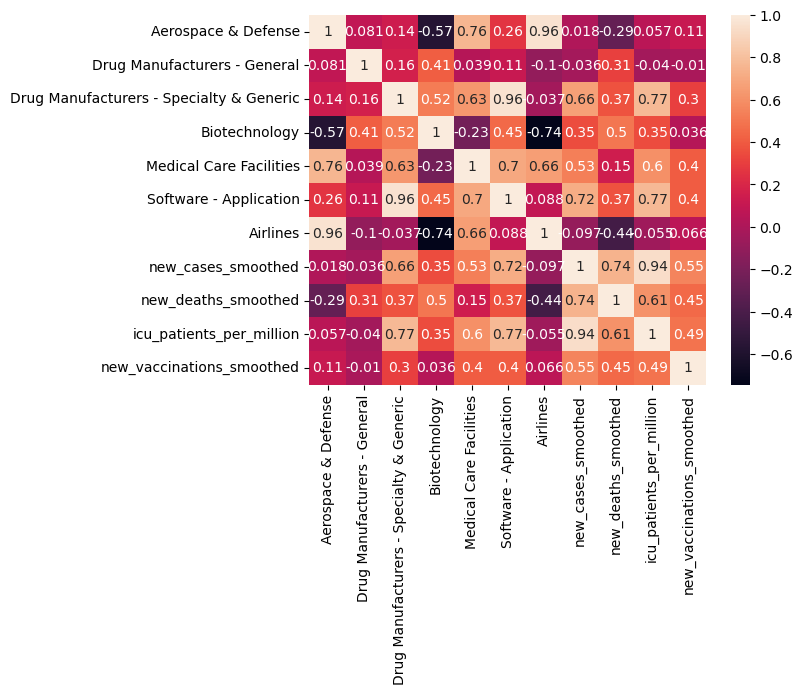

In [685]:
sns.heatmap(industries_us_covid_2020_corr, annot=True)

In [687]:
x = covid_sp500_industries_2020_filtered["icu_patients_per_million"]
y = covid_sp500_industries_2020_filtered["new_vaccinations_smoothed"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: 0.4868034137111865
P-Value: 5.218848598480761e-05
The correlation is statistically significant.


<h2>Testing for different effects in 2021</h2>

In [689]:
covid_sp500_industries_2021 = covid_sp500_industries[covid_sp500_industries["year"]==2021]
covid_sp500_industries_2021

,continent,location,year,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,icu_patients_per_million,yearly_week,Advertising Agencies,Aerospace & Defense,...,Travel Services,Trucking,Unknown,Utilities - Diversified,Utilities - Independent Power Producers,Utilities - Regulated Electric,Utilities - Regulated Gas,Utilities - Regulated Water,Utilities - Renewable,Waste Management
63,North America,United States,2021,1421874.429,19913.858,4433247.0,587.707,2021_W1,38.343404,175.368688,...,435.297374,96.813757,175.662503,37.993258,25.523662,55.137367,51.455174,142.519260,NaN,100.276522
64,North America,United States,2021,1656123.003,21756.286,6862061.0,589.190,2021_W2,38.589141,179.049270,...,431.797227,100.583865,181.437381,38.601906,27.579675,54.889773,49.694514,147.653540,NaN,99.398978
65,North America,United States,2021,1543655.860,23195.287,7752089.0,548.113,2021_W3,38.394903,177.866697,...,423.717431,102.006641,179.395149,39.371121,27.755257,55.110368,50.353657,150.515869,NaN,98.945599
66,North America,United States,2021,1237684.430,22459.855,9811404.0,491.801,2021_W4,39.098429,172.385290,...,397.577944,99.053767,171.795432,38.415111,27.335063,55.242896,50.352962,148.731589,NaN,96.645921
67,North America,United States,2021,1038428.570,21942.003,11088465.0,431.186,2021_W5,39.229425,177.774302,...,412.518627,99.961588,177.561914,39.339777,28.203046,55.229347,49.935712,152.932657,NaN,96.512659
68,North America,United States,2021,830581.716,20062.574,12486091.0,369.011,2021_W6,40.082414,182.679060,...,430.192434,104.075337,184.168436,40.363303,28.612107,54.996335,50.970304,153.157529,NaN,96.798985
69,North America,United States,2021,642416.714,19065.714,11408579.0,310.610,2021_W7,40.291383,181.754217,...,451.399190,104.075571,189.634605,40.378458,27.678595,54.200980,52.116011,149.775646,NaN,95.979615
70,North America,United States,2021,472380.141,14278.855,12838364.0,259.578,2021_W8,42.283754,183.642243,...,472.620275,105.451825,204.585858,38.906120,26.626023,52.808696,50.007228,139.178214,NaN,94.731043
71,North America,United States,2021,459320.713,12943.712,16459883.0,218.458,2021_W9,43.789123,183.612875,...,460.256777,108.461626,201.793866,37.980634,25.236140,52.635974,49.951693,128.743866,NaN,97.748444
72,North America,United States,2021,415490.569,10176.430,17681092.0,191.850,2021_W10,46.696293,187.413453,...,477.027429,111.548257,206.409305,40.249924,27.087410,55.003983,51.158182,128.085872,NaN,102.367355


In [691]:
covid_sp500_industries_2021_filtered = covid_sp500_industries_2021[['Aerospace & Defense',"Drug Manufacturers - General",  'Drug Manufacturers - Specialty & Generic','Biotechnology', 'Medical Care Facilities', 'Software - Application', 'Airlines','new_cases_smoothed', "new_deaths_smoothed","icu_patients_per_million","new_vaccinations_smoothed"]]


In [693]:
industries_us_covid_2021_corr = covid_sp500_industries_2021_filtered.corr()
industries_us_covid_2021_corr

,Aerospace & Defense,Drug Manufacturers - General,Drug Manufacturers - Specialty & Generic,Biotechnology,Medical Care Facilities,Software - Application,Airlines,new_cases_smoothed,new_deaths_smoothed,icu_patients_per_million,new_vaccinations_smoothed
Aerospace & Defense,1.000000,0.645416,0.398756,0.470876,0.785829,0.416553,0.184854,-0.549596,-0.746718,-0.453835,-0.399720
Drug Manufacturers - General,0.645416,1.000000,0.473676,0.636092,0.753272,0.457933,-0.246342,-0.163225,-0.447676,-0.089626,-0.560652
Drug Manufacturers - Specialty & Generic,0.398756,0.473676,1.000000,0.886443,0.611640,0.950203,-0.736785,0.237189,-0.063136,0.254187,-0.490771
Biotechnology,0.470876,0.636092,0.886443,1.000000,0.800396,0.842228,-0.638969,0.194262,-0.153348,0.286845,-0.590861
Medical Care Facilities,0.785829,0.753272,0.611640,0.800396,1.000000,0.557607,-0.203931,-0.123235,-0.481752,-0.005764,-0.588058
Software - Application,0.416553,0.457933,0.950203,0.842228,0.557607,1.000000,-0.676452,0.201396,-0.060874,0.235018,-0.428719
Airlines,0.184854,-0.246342,-0.736785,-0.638969,-0.203931,-0.676452,1.000000,-0.611292,-0.405590,-0.585196,0.445147
new_cases_smoothed,-0.549596,-0.163225,0.237189,0.194262,-0.123235,0.201396,-0.611292,1.000000,0.830572,0.959646,0.024008
new_deaths_smoothed,-0.746718,-0.447676,-0.063136,-0.153348,-0.481752,-0.060874,-0.405590,0.830572,1.000000,0.800141,0.182609
icu_patients_per_million,-0.453835,-0.089626,0.254187,0.286845,-0.005764,0.235018,-0.585196,0.959646,0.800141,1.000000,-0.012237


<Axes: >

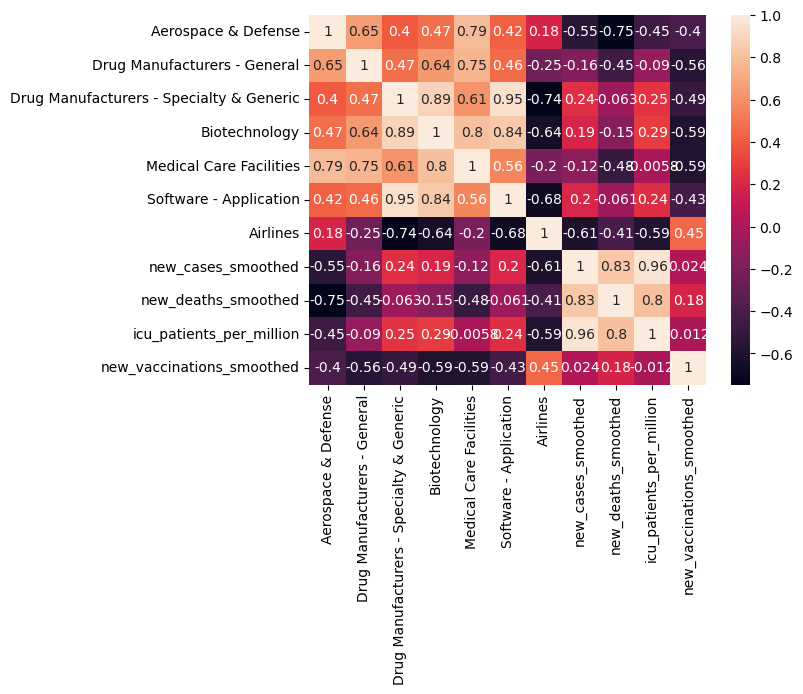

In [695]:
sns.heatmap(industries_us_covid_2021_corr, annot=True)

In [699]:
x = covid_sp500_industries_2021_filtered["Biotechnology"]
y = covid_sp500_industries_2021_filtered["new_vaccinations_smoothed"]

correlation_coefficient, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

Pearson Correlation Coefficient: -0.5908613919778396
P-Value: 6.696414733663162e-07
The correlation is statistically significant.
